In [205]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from Satellite import Satellite
from SatelliteState import SatelliteState
from Earth import Earth
import utilities

import numpy as np

import matplotlib.pyplot as plt

earth_radius = 6378136.6

init_r = earth_radius+800000
angular_vel = 0.001454
angular_vel = 0.0010830807404
angular_vel = 0.0010430807404
tang_vel = angular_vel * init_r
#tang_vel = 60 * 4.848e-6 * init_r

sat_state = SatelliteState(np.array([init_r, np.pi/2, 0]), np.array([0]), np.array([0, tang_vel, 0]), np.array([0]))

earth = Earth()


sat1 = Satellite(sat_state, 0, earth=earth)

In [68]:
sol = sat1.simulate(10000000)

In [69]:
sol

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  1.000e+00 ...  3.284e+05  3.284e+05]
        y: [[ 7.178e+06  7.178e+06 ...  1.339e+154  1.340e+154]
            [ 0.000e+00  7.393e-02 ...  1.397e+151  1.398e+151]
            [ 1.571e+00  1.572e+00 ...  3.441e+02  3.441e+02]
            [ 7.487e+03  7.487e+03 ...  1.397e+151  1.398e+151]]
      sol: None
 t_events: [array([], dtype=float64)]
 y_events: [array([], dtype=float64)]
     nfev: 1868
     njev: 0
      nlu: 0

In [70]:
sol.y[0]

array([7.17813660e+006, 7.17813664e+006, 7.17813675e+006, ...,
       1.33755274e+154, 1.33894865e+154, 1.34034601e+154])

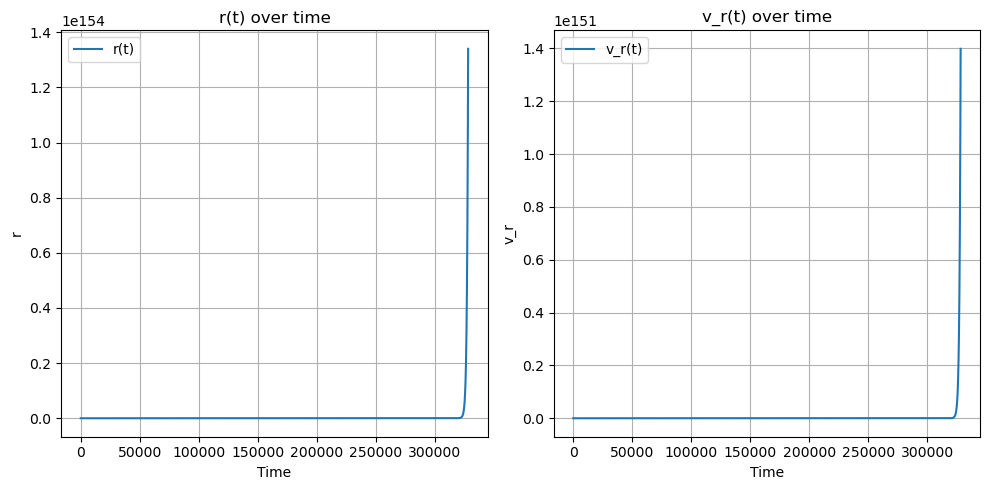

In [71]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='r(t)')
plt.title('r(t) over time')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='v_r(t)')
plt.title('v_r(t) over time')
plt.xlabel('Time')
plt.ylabel('v_r')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

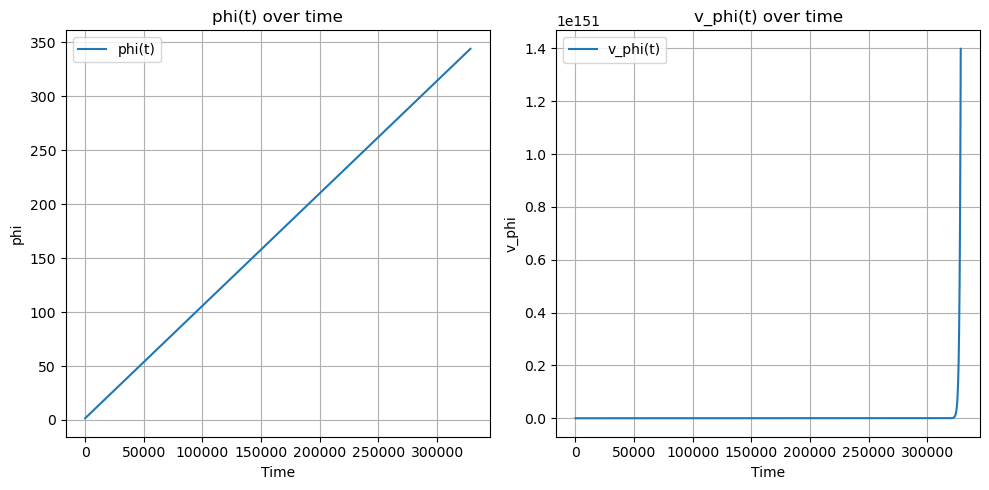

In [72]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[2], label='phi(t)')
plt.title('phi(t) over time')
plt.xlabel('Time')
plt.ylabel('phi')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[3], label='v_phi(t)')
plt.title('v_phi(t) over time')
plt.xlabel('Time')
plt.ylabel('v_phi')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

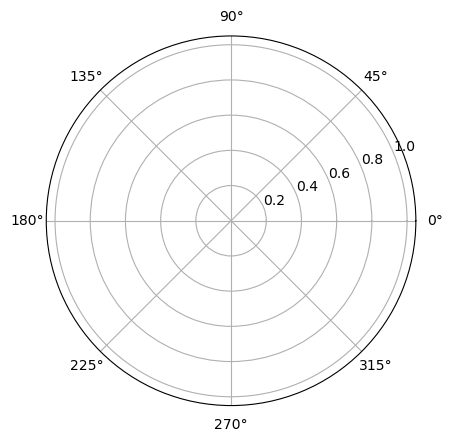

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

n=np.argmin(np.abs(sol.y[0]-earth_radius))

R = sol.y[0][:n]-earth_radius
rad = sol.y[2][:n]
Phi = [np.pi/2 for i in rad]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(rad, R)

plt.show()

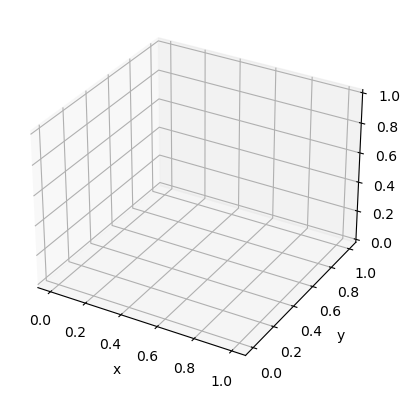

In [45]:
X = R*np.sin(rad)*np.cos(Phi)
Y = R*np.sin(rad)*np.sin(Phi)
Z = R*np.cos(rad)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot3D(Z,
    X, Y)

r = earth_radius
# Generate data for the sphere
#u = np.linspace(0, 2 * np.pi, 100)
#v = np.linspace(0, np.pi, 100)
#x = r * np.outer(np.cos(u), np.sin(v))
#y = r * np.outer(np.sin(u), np.sin(v))
#z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere with semi-transparency
#ax.plot_surface(x, y, z, color='r', alpha=0.4)  # Adjust color and transparency

#ax.set_aspect('equal')
ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')
plt.show()

In [37]:
import plotly.graph_objects as go

In [11]:
fig = go.Figure()

# Generate a sphere (Earth)
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = earth_radius * np.sin(theta) * np.cos(phi)
y = earth_radius * np.sin(theta) * np.sin(phi)
z = earth_radius * np.cos(theta)

# Plot Earth
fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Blues', opacity=0.6, showscale=False))

# Plot Satellite Path
fig.add_trace(go.Scatter3d(x=X, y=Y, z=Z, mode='lines', line=dict(color='red', width=2)))

fig.update_layout(
    title="Satellite Trajectory around the Earth",
    scene=dict(
        xaxis=dict(nticks=4, range=[-7000, 7000], title='X (km)'),
        yaxis=dict(nticks=4, range=[-7000, 7000], title='Y (km)'),
        zaxis=dict(nticks=4, range=[-7000, 7000], title='Z (km)'),
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ),
    scene_camera=dict(
        eye=dict(x=1.5, y=1.5, z=1.5)
    )
)

fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create figure and add axes with a global projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()  # Add a stock image of Earth

# Define satellite ground track example data (longitude, latitude)
# For example, these could be calculated from satellite's position data
lons = np.linspace(-180, 180, 100)
lats = np.sin(np.deg2rad(lons)) * 30  # Example sinusoidal path

# Plot the satellite ground track
ax.plot(lons, lats, 'r-', transform=ccrs.Geodetic(), label='Satellite Path')

# Add features and labels
ax.coastlines()
ax.set_global()
ax.legend()

plt.show()


In [1110]:
import numpy as np
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
import pyqtgraph.opengl as gl

app = QtGui.QApplication([])
w = gl.GLViewWidget()
w.show()
w.setWindowTitle('Satellite Orbit around 3D Earth')

# Create a sphere (earth)
globe = gl.MeshData.sphere(rows=100, cols=100)
globe_mesh = gl.GLMeshItem(meshdata=globe, smooth=True, shader='shaded', color=(0, 0, 1, 1))
w.addItem(globe_mesh)

# Satellite orbit data
#theta = np.linspace(0, 2 * np.pi, 100)
#r = 2  # Orbital radius in Earth radii
#x = r * np.cos(theta)
#y = r * np.sin(theta)
#z = r * np.sin(theta / 2)  # Just as an example for 3D effect

# Plot satellite orbit
orbit = np.vstack([X, Y, Z]).T
orbit_item = gl.GLLinePlotItem(pos=orbit, color=(1, 0, 0, 1), width=2)
w.addItem(orbit_item)

# Start Qt event loop unless running in interactive mode
if __name__ == '__main__':
    QtGui.QApplication.instance().exec_()


AttributeError: module 'pyqtgraph.Qt.QtGui' has no attribute 'QApplication'

In [1112]:
from mayavi import mlab
import numpy as np

# Generate a sphere (earth)
phi, theta = np.mgrid[0:np.pi:100j, 0:2*np.pi:100j]
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Display the Earth
mlab.figure(1, bgcolor=(0, 0, 0), size=(400, 300))
mlab.clf()
mlab.mesh(x, y, z, color=(0, 0, 1))

# Satellite trajectory
t = np.linspace(0, 2 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = 0.1 * t  # Spiral out
mlab.plot3d(x, y, z, color=(1, 0, 0), tube_radius=0.02)

mlab.show()


********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



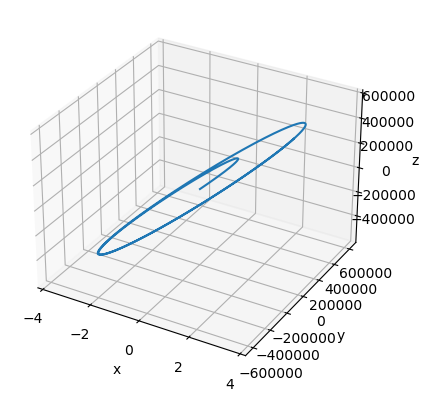

In [1102]:
X, Y, Z = X, Z, Y

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot3D(
    X, Y, Z)

ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')
#ax.set_aspect('equal')
plt.show()